In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
import os

In [ ]:
# , 

In [12]:
for root, dirs, files in os.walk(r"C:\Users\sushmita-khan\Desktop\Job Posting reports\August 2019"):
    for filename in files:
        data = pd.read_csv(os.path.join(root, filename), header=1,encoding='windows-1252',error_bad_lines=False)

b'Skipping line 88: expected 2 fields, saw 8\n'
b'Skipping line 6: expected 1 fields, saw 2\nSkipping line 19: expected 1 fields, saw 2\n'
b'Skipping line 88: expected 2 fields, saw 8\nSkipping line 253: expected 2 fields, saw 3\n'
b'Skipping line 6: expected 2 fields, saw 19\n'
b'Skipping line 4: expected 1 fields, saw 2\nSkipping line 7: expected 1 fields, saw 25\nSkipping line 8: expected 1 fields, saw 3\nSkipping line 42: expected 1 fields, saw 2\n'


In [506]:
# master_file = pd.read_csv(r'C:\Users\sushmita-khan\Desktop\Job Posting reports\job_masterFile.csv')

In [507]:
#Read FY19-20 Files: Date to Month
FY19_20_file = pd.read_csv(r'C:\Users\sushmita-khan\Desktop\Job Posting reports\fy_19_20.csv', header=1)

FY19_20_file.drop(columns='Unnamed: 2', axis=1, inplace=True)
FY19_20_file.rename(columns={'Total Jobs': "jobs:19/20"}, inplace=True)

In [447]:
# FY19_20_file

In [705]:
month_merge = master_file.merge(FY19_20_file,  how='outer', on='Job Type')

In [2]:
#Read FY19-20 Files: Weekly files of the previous month
import os
import numpy as np

full_data = month_merge.copy()

for root, dirs, files in os.walk(r"C:\Users\sushmita-khan\Desktop\Job Posting reports\Report_July"):
    for filename in files:
        week_df = pd.read_csv(os.path.join(root, filename), header=1)
        week_df.drop(columns='Unnamed: 2', axis=1, inplace=True)
        week_df.rename(columns={'Total Jobs': "jobs:"+filename[:-4]}, inplace=True)
        full_data = full_data.merge(week_df, on='Job Type', how='outer')

full_data.fillna(0, inplace=True)

full_data.loc['Total', :]= full_data.sum(axis=0, numeric_only=True)
count_cols = list(full_data)[1:]
full_data[count_cols] = full_data[count_cols].apply(lambda x: x.astype(np.int64))

full_data.fillna('-', inplace=True)

# full_data

NameError: name 'month_merge' is not defined

In [704]:
'''
1. Total Jobs posted in Current FY
2. Total Jobs posted in Current FY month
3. YTD comparison 18 vs 19
'''

# (full_data[['Job Type','jobs:19/20','jobs:fy_19_Jul','jobs:fy_18_Jul']])

report_tab = full_data[['Job Type','jobs:19/20','jobs:fy_19_Jul','jobs:fy_18_Jul']]

report_tab.rename(columns = {'jobs:19/20': 'FY 19/20: YTD', 'jobs:fy_19_Jul': 'July 2019', 'jobs:fy_18_Jul': 'July 2018'},
                  inplace=True)

(HTML(report_tab.to_html(index=False)))

Job Type,FY 19/20: YTD,July 2019,July 2018
Full Time,128,128,156
Internship,46,46,37
Part Time,30,30,6
Co-Op,10,10,2
Seasonal,2,2,0
Temporary,5,5,0
Temp/Seasonal,0,0,0
Volunteer,1,1,0
Job Shadow,0,0,0
On Campus,0,0,0


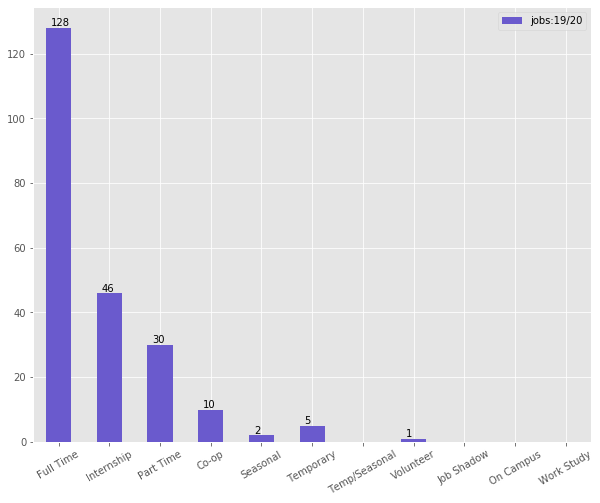

In [714]:
'''
Total Jobs posted in 2019

'''
fy_19 = full_data[['Job Type','jobs:19/20']][:11].plot(kind='bar',  color=["slateblue"], figsize=[10,8],
                                                       label='FY 2019: YTD posted jobs')

fy_19.set_xticklabels(['Full Time','Internship','Part Time','Co-op','Seasonal', 'Temporary', 'Temp/Seasonal', 
                       'Volunteer', 'Job Shadow', 'On Campus', 'Work Study'], rotation=30)

#ANNOTATE BARS
totals = []

# find the values and append to list
for i in fy_19.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in fy_19.patches:
    # get_width pulls left or right; get_y pushes up or down
    if i.get_height()>0:
        fy_19.text(i.get_x()+0.1, i.get_height()+0.5, \
            str(i.get_height()), fontsize=10, color='black')

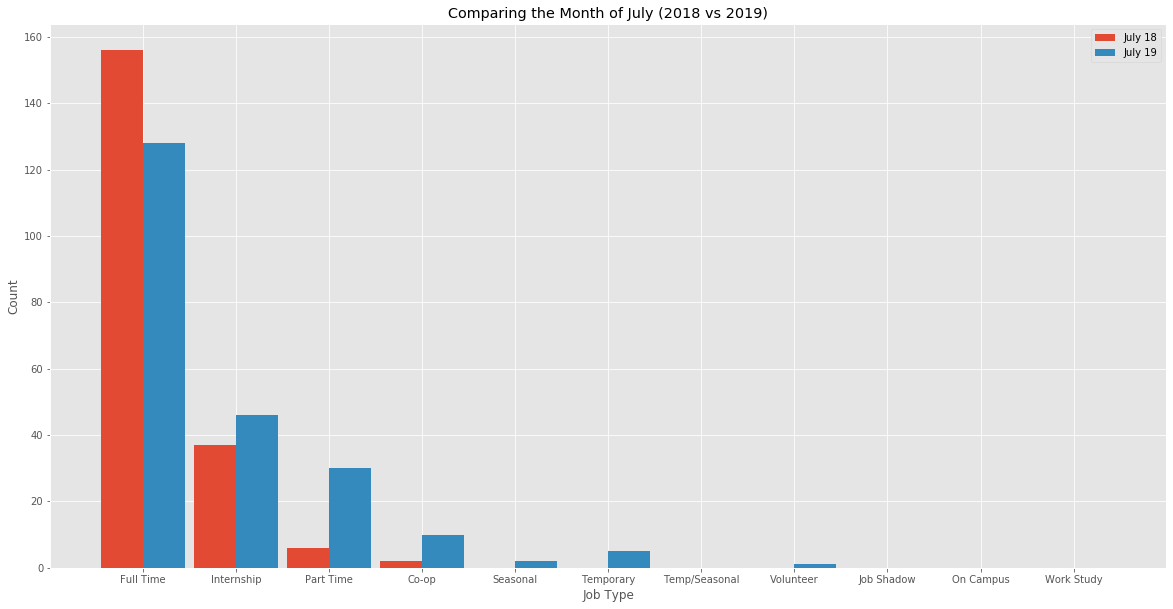

In [713]:
'''
Month to Month Comparison: 18 vs 19
'''

# plt.figure(figsize=(20,10))
# plt.title('Month to Month Comparison')

# jul_18 = plt.plot(full_data['Job Type'][:11], full_data['jobs:fy_18_Jul'][:11], color='blue', marker='*',
#                           markersize=15, label='July 2018')
# jul_19 = plt.plot(full_data['Job Type'][:11], full_data['jobs:fy_19_Jul'][:11],color='red', marker='.',
#                         markersize=15,label='July 2019')

# plt.legend([jul_18,jul_19], ['July 2018','July 2019'])


bar_width = 0.45
index = np.arange(11)

fig, ax = plt.subplots(figsize=(20,10))
jul_18 = ax.bar(index, full_data['jobs:fy_18_Jul'][:11], bar_width,
                label="July 18")
jul_19 = ax.bar(index+bar_width, full_data['jobs:fy_19_Jul'][:11],
                 bar_width, label="July 19")

ax.set_xlabel('Job Type')
ax.set_ylabel('Count')
ax.set_title('Comparing the Month of July (2018 vs 2019)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Full Time','Internship','Part Time','Co-op','Seasonal', 'Temporary', 'Temp/Seasonal', 
                       'Volunteer', 'Job Shadow', 'On Campus', 'Work Study'])
ax.legend()

plt.show()

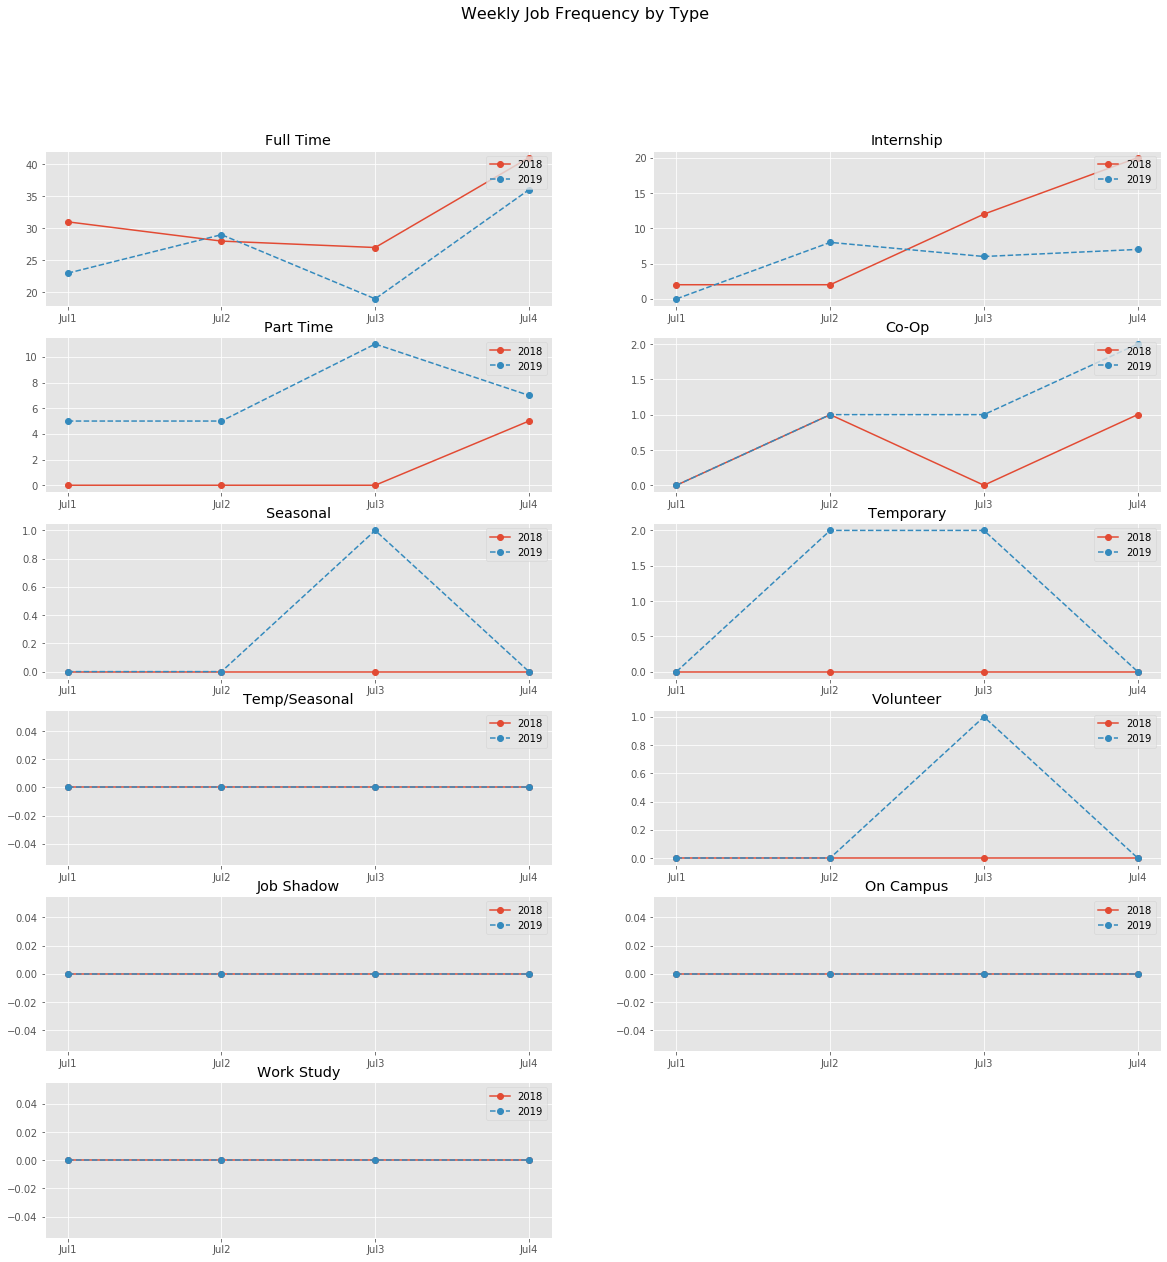

In [716]:
my_data = full_data[['Job Type', 'jobs:fy_18_Jul1',
                     'jobs:fy_18_Jul2', 'jobs:fy_18_Jul3',
                     'jobs:fy_18_Jul4', 'jobs:fy_19_Jul1',
                     'jobs:fy_19_Jul2','jobs:fy_19_Jul3',
                     'jobs:fy_19_Jul4']][:11].set_index('Job Type').T.reset_index()

weeks = ['Jul1', 'Jul2', 'Jul3', 'Jul4']
fig, axes = plt.subplots(int(len(my_data.keys())/2), 2, figsize=(20,20))
fig.suptitle('Weekly Job Frequency by Type', fontsize=16)
for i, col in enumerate(list(my_data)[1:]):
    axes[int(i/2), i%2].plot(weeks, my_data[col][:4], marker='o', label='2018')
    axes[int(i/2), i%2].plot(weeks, my_data[col][4:], ls='--', marker='o', label='2019')
    axes[int(i/2), i%2].title.set_text(col)
    axes[int(i/2), i%2].legend(loc="upper right")

if len(my_data.keys())%2 == 0:
    fig.delaxes(axes[int(len(my_data.keys())/2 - 1), 1])
    
fig.savefig(r'C:\Users\sushmita-khan\Desktop\Job Posting reports\Report_July\temp.png', dpi=fig.dpi)

<class 'numpy.ndarray'>


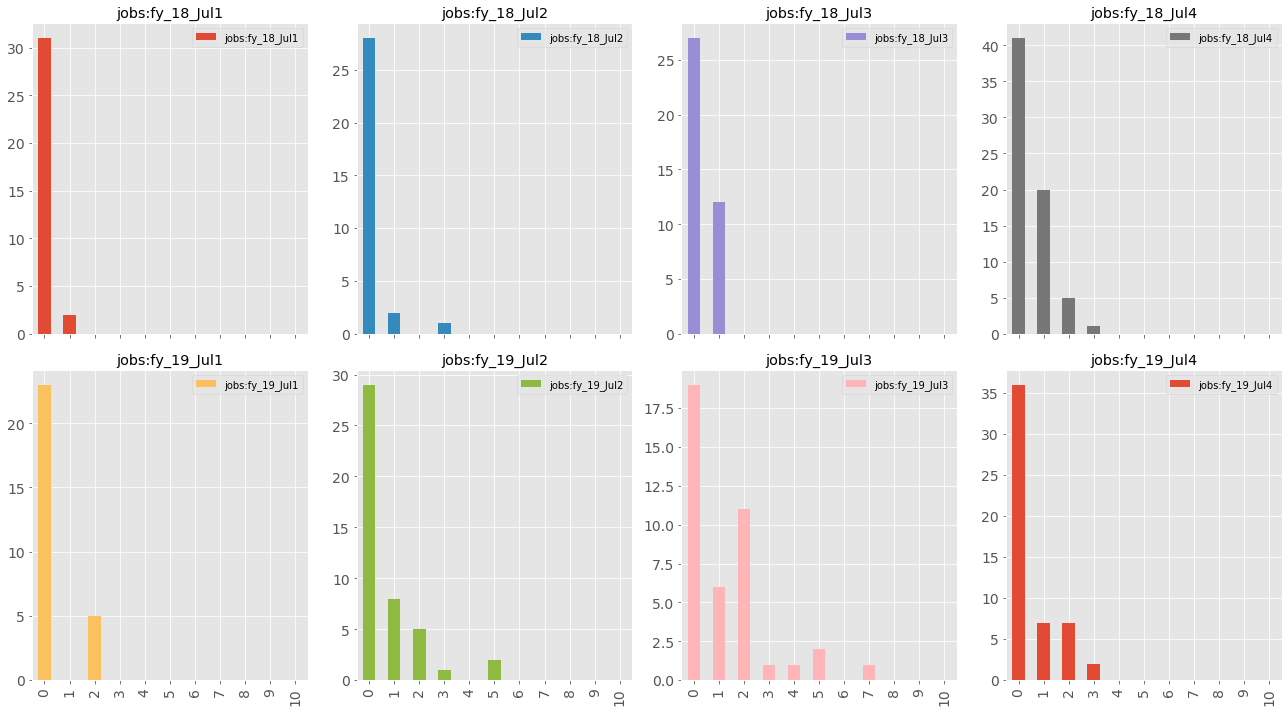

In [529]:
ax = full_data[['jobs:fy_18_Jul1', 'jobs:fy_18_Jul2', 'jobs:fy_18_Jul3', 'jobs:fy_18_Jul4',
                'jobs:fy_19_Jul1','jobs:fy_19_Jul2','jobs:fy_19_Jul3','jobs:fy_19_Jul4']][:11].plot(kind = 'line',
                                                        subplots=True,layout=(2, 4), legend=True,figsize=(18,10),
                                                        fontsize=14, marker='*')
                                                
# ax.set_xticklabels(["Full Time","Internship","Part Time","Co-Op","Seasonal"], rotation=0, fontsize=14)
print(type(ax))
plt.tight_layout()

In [455]:
'''
Descriptive Statistics
1. Mean Job posting: YTD FY 19
2. Mean Job Posting: YTD FY 18
'''

from pandas.plotting import bootstrap_plot
# bootstrap_plot(full_data['jobs:19/20'], color='grey')

full_data[['jobs:19/20', 'jobs:fy_19_Jul', 'jobs:fy_18_Jul']][:11].describe()

,jobs:19/20,jobs:fy_19_Jul,jobs:fy_18_Jul
count,11.000000,11.000000,11.000000
mean,20.181818,20.181818,18.272727
std,38.793861,38.793861,46.981041
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000
75%,20.000000,20.000000,4.000000
max,128.000000,128.000000,156.000000


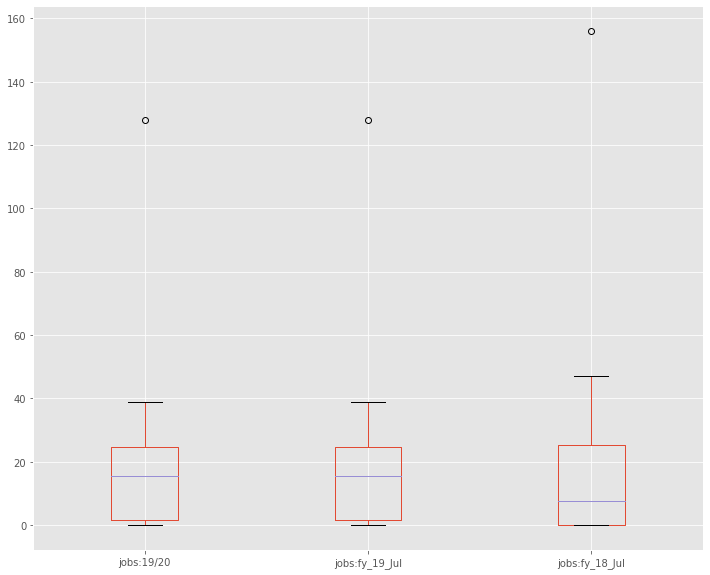

In [482]:
full_data[['jobs:19/20', 'jobs:fy_19_Jul', 'jobs:fy_18_Jul']][:11].describe().plot(kind='box', figsize=[12,10])

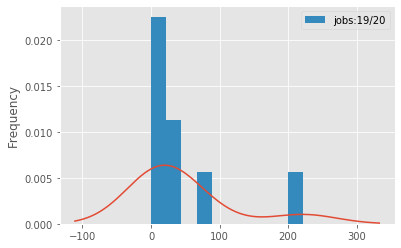

In [478]:

fig, ax = plt.subplots()

ytd_fy19.plot.kde(ax=ax, legend=False)
ytd_fy19.plot.hist(density=True, ax=ax)